In [250]:
# importing the libraries
import numpy as np
import peakutils
import syntheticdata
import threegaussians
import lorentzian
from peakutils.plot import plot as pplot
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
from scipy import interpolate

# Savitzky_Golay_Smoothing_Function

In [255]:
# using savitzky_golay function to smoothen the noise data

def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    
    """Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.

    """
    import numpy as np
    from math import factorial

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [256]:
def savitzky_golay_smoothing(nm_array, timedelay, noise_coefficient):
    import numpy as np
    import scipy.fftpack
    from matplotlib import pyplot as plt
    %matplotlib inline
    
    """
    Notes
    -----   
    generates a denoise curve from the TA data
    Parameters
    ----------
        nm_array: wavelength array
        timedelay: time delay array
        noise_coefficient: the noise coefficients that user want to generate
    Returns
    -------
        a smoothing curve from the original noise curve   
    """
 
   # generate some noisy data from syntheticdata:
    np.random.seed(1729)
    y_noise = noise_coefficient * np.random.normal(size=nm_array.size)
    ydata = timedelay + y_noise
    yhat = savitzky_golay(ydata, 51, 3) # window size 51, polynomial order 3
    
   # plot the noise data curve and denoise curve
    plt.figure(figsize=(15,8))
    plt.title('Peak Smoothening', fontsize = 16, fontweight = 'bold')
    plt.xlabel('Wavelength (nm)', fontsize = 16, fontweight = 'bold')
    plt.ylabel('Time delay (ps)', fontsize = 16, fontweight = 'bold')
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.plot(nm_array,ydata)
    plt.plot(nm_array,yhat, color='red')
    
    plt.show()
    return

## Define different values in the savitzky_golay function 

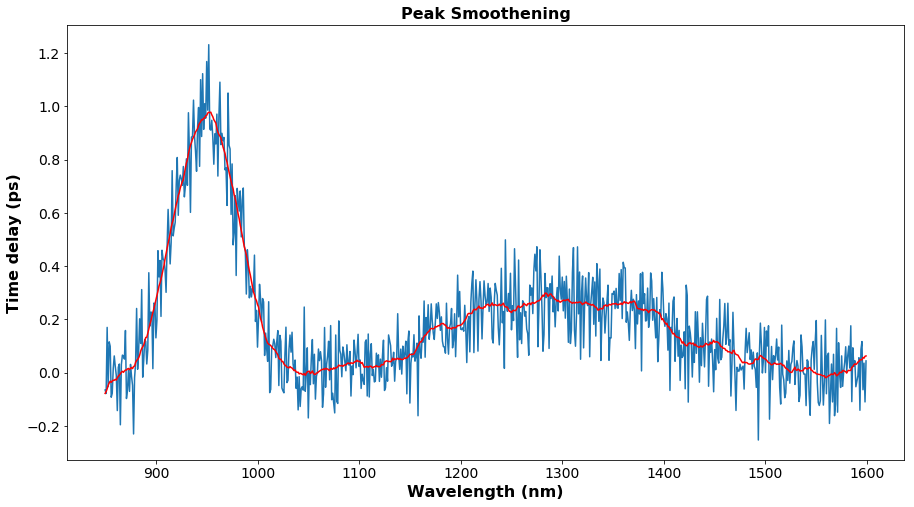

In [257]:
# return denoise curve of a two-gaussian mixture noise model
nm_array = syntheticdata.nm
timedelay = (syntheticdata.species_1 + syntheticdata.species_2)
noise_coefficient =0.1
savitzky_golay_smoothing(nm_array, timedelay, noise_coefficient)

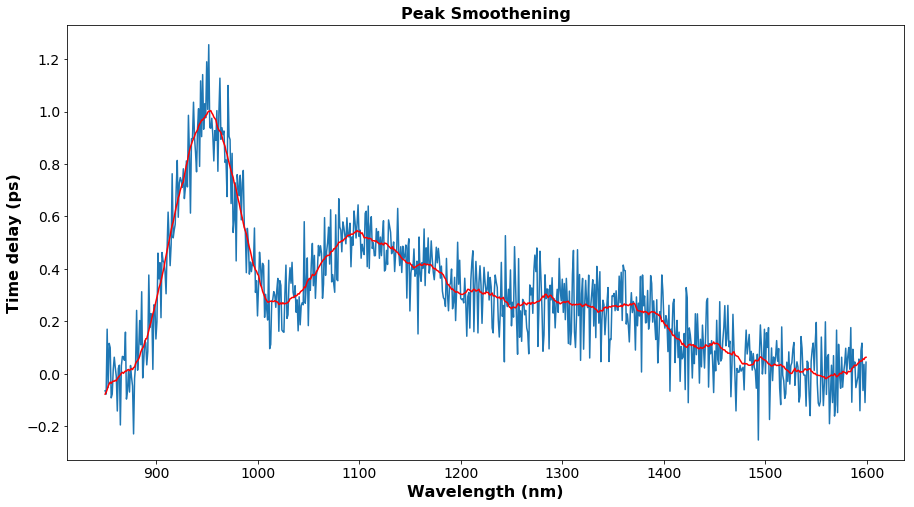

In [239]:
# return denoise curve of a three-gaussian mixture noise model
nm_array = syntheticdata.nm
timedelay = threegaussians.species_1 + threegaussians.species_2+threegaussians.species_3
noise_coefficient =0.1
savitzky_golay_smoothing(nm_array, timedelay, noise_coefficient)

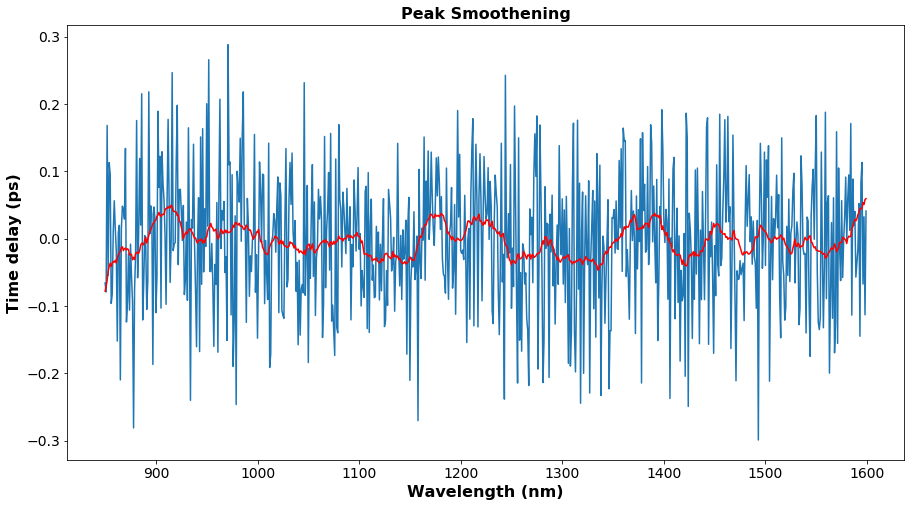

In [240]:
# return denoise curve of a lorentzian noise model
nm_array = syntheticdata.nm
timedelay = lorentzian.species_1
noise_coefficient =0.1
savitzky_golay_smoothing(nm_array, timedelay, noise_coefficient)

# Earth Function

In [268]:
def Earth_Smoothing(nm_array, timedelay, noise_coefficient):
    import numpy
    import matplotlib.pyplot as plt
    from pyearth import Earth
    
    """
     ============================================
     Plotting derivatives of simple sine function
    ============================================

     A simple example plotting a fit of the sine function
    and the derivatives computed by Earth.
    
    Notes
    -----   
    generates a denoise curve from the TA data
    Parameters
    ----------
        nm_array: wavelength array
        timedelay: time delay array
        noise_coefficient: the noise coefficients that user want to generate
    Returns
    -------
        a smoothing curve from the original noise curve   
    """
    # Create some fake data
    # generate some noisy data from syntheticdata:
    np.random.seed(1729)
    y_noise = noise_coefficient * np.random.normal(size=nm_array.size)
    ydata = timedelay + y_noise
    
   # Fit an Earth model
    model = Earth(max_degree=2, minspan_alpha=.5, smooth=True)
    model.fit(nm_array, ydata)

   # Print the model
    print(model.trace())
    print(model.summary())

   # Get the predicted values and derivatives
    y_hat = model.predict(nm_array)

    # Plot true and predicted function values 
    plt.figure(figsize=(15,8))
    plt.title('Peak Smoothening', fontsize = 16, fontweight = 'bold')
    plt.xlabel('Wavelength (nm)', fontsize = 16, fontweight = 'bold')
    plt.ylabel('Time delay (ps)', fontsize = 16, fontweight = 'bold')
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.plot(nm_array, ydata, 'r.')
    plt.plot(nm_array, y_hat, 'b.')
    plt.ylabel('function')
    
    return

    

## Define different values in the earth function 

/Users/tutu/miniconda3/lib/python3.6/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/tutu/miniconda3/lib/python3.6/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.061328  1      0.061  0.000  0.000  
1     0       0    67    0.045732  3      0.046  0.254  0.244  
2     1       0    142   0.020814  5      0.021  0.661  0.651  
3     1       0    382   0.011135  7      0.012  0.818  0.811  
4     1       0    162   0.010550  9      0.011  0.828  0.818  
5     0       0    27    0.010152  11     0.011  0.834  0.823  
6     0       0    127   0.009886  13     0.011  0.839  0.825  
7     0       0    462   0.009645  15     0.011  0.843  0.827  
8     13      0    574   0.009432  17     0.011  0.846  0.828  
9     0       0    -1    0.009400  18     0.011  0.847  0.828  
---------------------------------------------------------------
Stopping Condition 2: Improvement below threshold

Pruning Pass
---------------------------

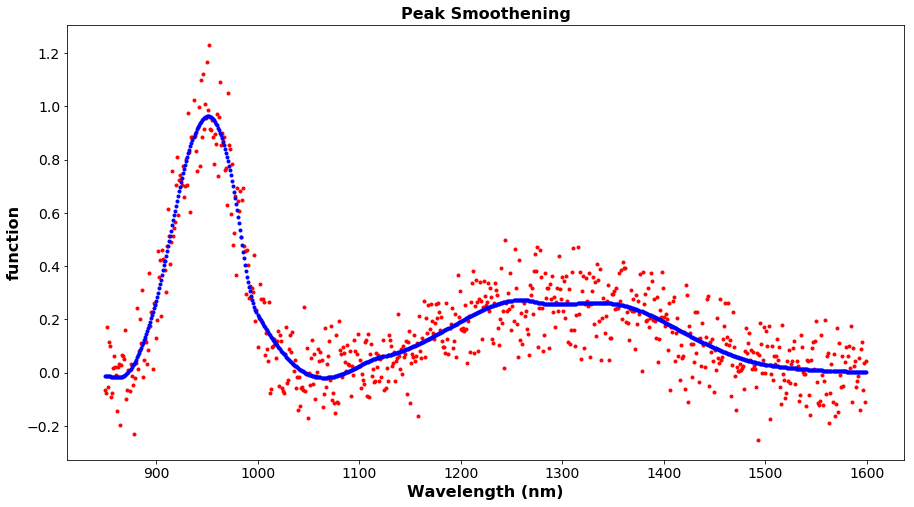

In [269]:
# return denoise curve of a two-gaussian mixture noise model
nm_array = syntheticdata.nm
timedelay = (syntheticdata.species_1 + syntheticdata.species_2)
noise_coefficient =0.1
Earth_Smoothing(nm_array, timedelay, noise_coefficient)

/Users/tutu/miniconda3/lib/python3.6/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/tutu/miniconda3/lib/python3.6/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.065045  1      0.065  0.000  0.000  
1     0       0    82    0.021554  3      0.022  0.669  0.664  
2     1       0    130   0.015264  5      0.016  0.765  0.759  
3     1       0    242   0.012054  7      0.013  0.815  0.807  
4     2       0    49    0.011013  9      0.012  0.831  0.821  
5     1       0    150   0.010195  11     0.011  0.843  0.832  
6     0       0    357   0.009788  13     0.011  0.850  0.837  
7     11      0    622   0.009515  15     0.010  0.854  0.839  
8     0       0    512   0.009439  17     0.011  0.855  0.838  
9     11      0    -1    0.009431  18     0.011  0.855  0.837  
---------------------------------------------------------------
Stopping Condition 2: Improvement below threshold

Pruning Pass
---------------------------

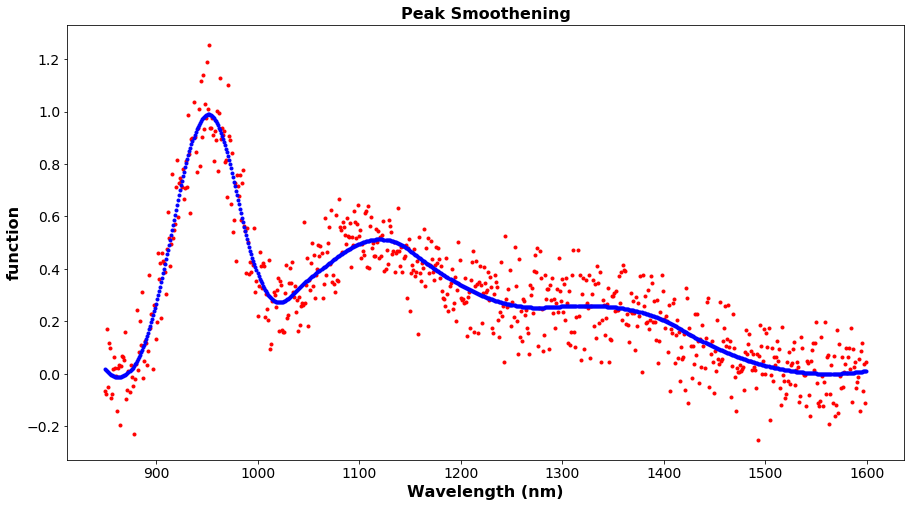

In [271]:
# return denoise curve of a three-gaussian mixture noise model
nm_array = syntheticdata.nm
timedelay = threegaussians.species_1 + threegaussians.species_2+threegaussians.species_3
noise_coefficient =0.1
Earth_Smoothing(nm_array, timedelay, noise_coefficient)

Forward Pass
----------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq    
----------------------------------------------------------------
0     -       -    -     0.009670  1      0.010  0.000  0.000   
1     0       0    -1    0.009664  2      0.010  0.001  -0.006  
----------------------------------------------------------------
Stopping Condition 2: Improvement below threshold

Pruning Pass
---------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq    
---------------------------------------------
0     -   2      0.01  0.010  0.001  -0.006  
1     1   1      0.01  0.010  0.000  0.000   
---------------------------------------------
Selected iteration: 1

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      -0.003554    
x0              Yes     None         
--------------------------------

/Users/tutu/miniconda3/lib/python3.6/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/tutu/miniconda3/lib/python3.6/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


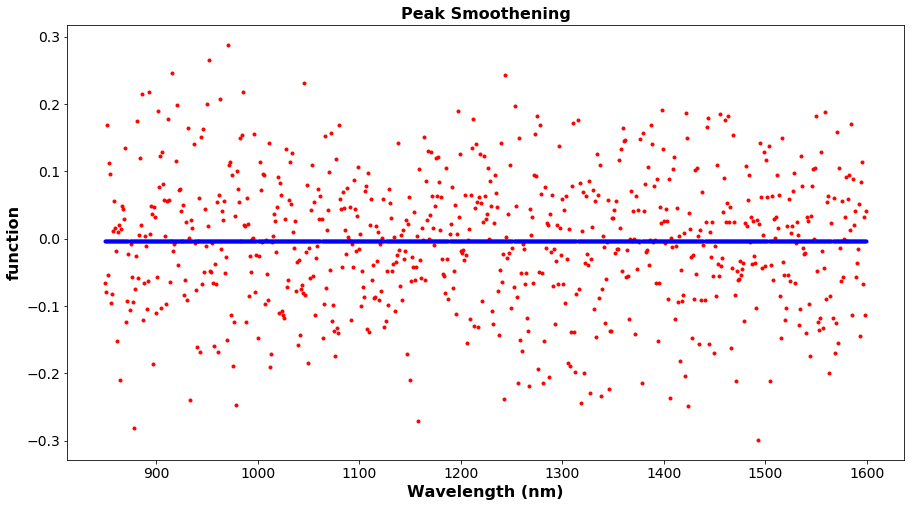

In [273]:
# return denoise curve of a lorentzian noise model
nm_array = syntheticdata.nm
timedelay = lorentzian.species_1
noise_coefficient =0.1
Earth_Smoothing(nm_array, timedelay, noise_coefficient)

## Use above function to find peaks

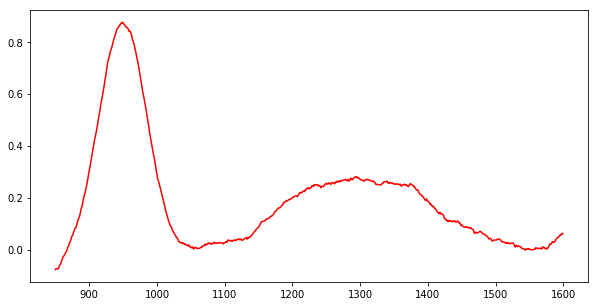

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack

# generate some noisy data from two Gaussians:
x = syntheticdata.nm
y = (syntheticdata.species_1 + syntheticdata.species_2)
np.random.seed(1729)
y_noise = 0.1 * np.random.normal(size=x.size)
ydata = y + y_noise

yhat = savitzky_golay(ydata, 51, 1) # window size 51, polynomial order 3

plt.figure(figsize=(10,5))
plt.plot(x,yhat, color='red')
plt.show()

[101 409 484]
[ 951 1259 1334] [0.96255768 0.2728158  0.26256775]


Text(0.5,1,'First estimate')

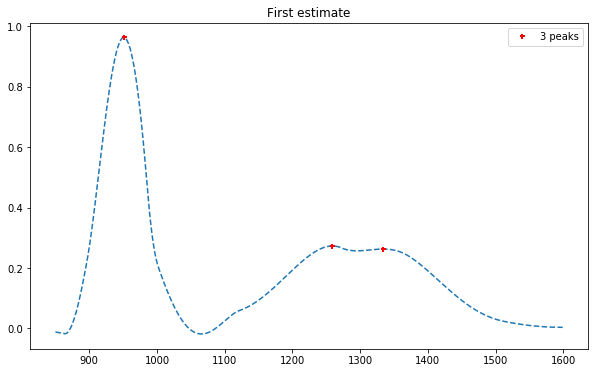

In [128]:
indexes = peakutils.indexes(y_hat, thres=0, min_dist=5)
print(indexes)
print(x[indexes], y_hat[indexes])
pyplot.figure(figsize=(10,6))
pplot(x, y_hat, indexes)
pyplot.title('First estimate')

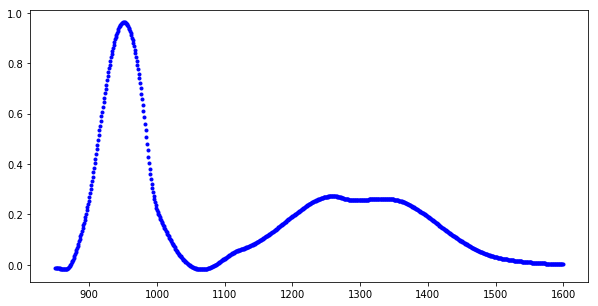

In [123]:
plt.figure(figsize=(10,5))
plt.plot(X, y_hat, 'b.')

[101 409 484]
[ 951 1259 1334] [0.96255768 0.2728158  0.26256775]


Text(0.5,1,'First estimate')

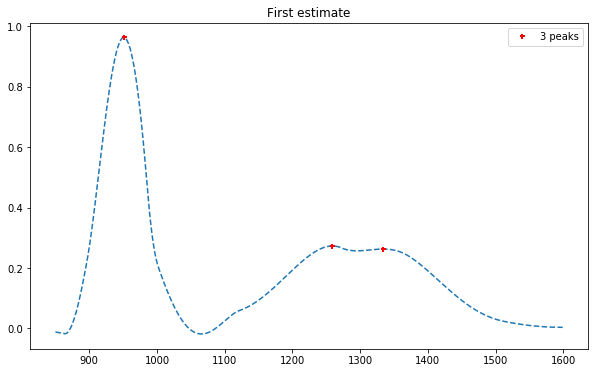

In [124]:
indexes = peakutils.indexes(y_hat, thres=0, min_dist=5)
print(indexes)
print(X[indexes], y_hat[indexes])
pyplot.figure(figsize=(10,6))
pplot(X, y_hat, indexes)
pyplot.title('First estimate')

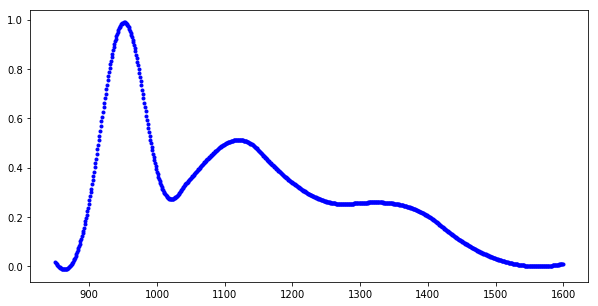

In [115]:
plt.figure(figsize=(10,5))
plt.plot(x, n_hat, 'b.')

[101 270 473]
[ 951 1120 1323] [0.98883327 0.51259086 0.25942594]


Text(0.5,1,'First estimate')

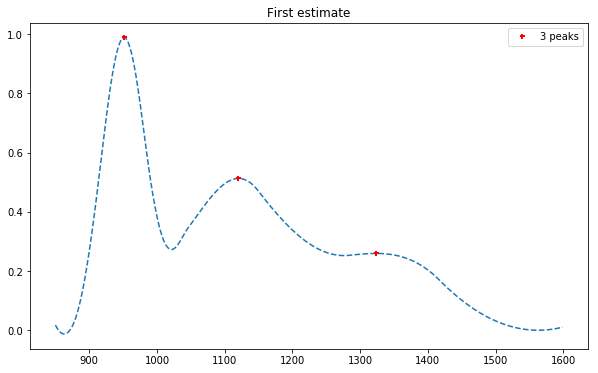

In [118]:
indexes = peakutils.indexes(n_hat, thres=0, min_dist=5)
print(indexes)
print(x[indexes], n_hat[indexes])
pyplot.figure(figsize=(10,6))
pplot(x, n_hat, indexes)
pyplot.title('First estimate')

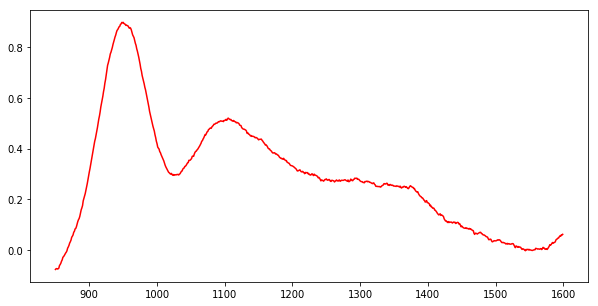

In [133]:
# generate some noisy data from two Gaussians:
# generate numbers
x = threegaussians.nm
#generate a two-gaussian mixture model with time decays and spectral shift 
n = threegaussians.species_1 + threegaussians.species_2+threegaussians.species_3
np.random.seed(1729)
n_noise = 0.1 * np.random.normal(size=x.size)
ndata = n + n_noise

nhat = savitzky_golay(ndata, 51, 1) # window size 51, polynomial order 3

plt.figure(figsize=(10,5))
plt.plot(x,nhat, color='red')
plt.show()

[101 270 473]
[ 951 1120 1323] [0.98883327 0.51259086 0.25942594]


Text(0.5,1,'First estimate')

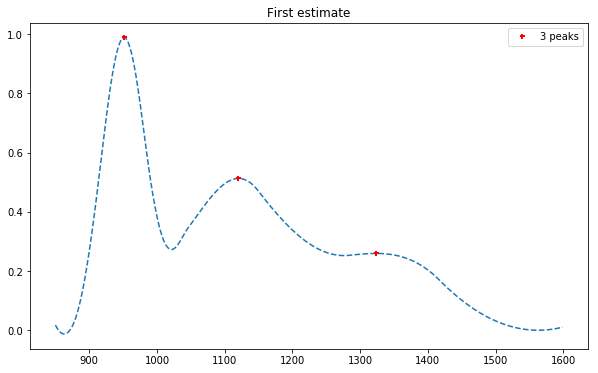

In [132]:
indexes = peakutils.indexes(n_hat, thres=0, min_dist=5)
print(indexes)
print(x[indexes], n_hat[indexes])
pyplot.figure(figsize=(10,6))
pplot(x, n_hat, indexes)
pyplot.title('First estimate')

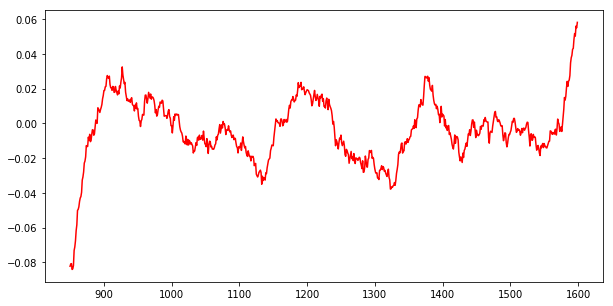

In [142]:
# generate some noisy data from two Gaussians:
# generate numbers
x = lorentzian.nm
#generate a two-gaussian mixture model with time decays and spectral shift 
n = lorentzian.species_1
np.random.seed(1729)
n_noise = 0.1 * np.random.normal(size=x.size)
ndata = n + n_noise

n_hat = savitzky_golay(ndata, 51, 1) # window size 51, polynomial order 3

plt.figure(figsize=(10,5))
plt.plot(x,n_hat, color='red')
plt.show()

[  2  27  33  41  55  63  71  77  85  91  98 107 116 127 136 146 155 171
 179 191 197 206 216 226 234 241 249 255 263 270 281 289 298 304 312 319
 327 334 341 350 361 372 379 389 400 408 415 427 436 445 453 460 470 479
 490 498 509 518 528 535 542 548 554 561 568 580 588 595 606 613 621 628
 638 648 656 667 675 681 691 698 709 720 734 747]
[ 852  877  883  891  905  913  921  927  935  941  948  957  966  977
  986  996 1005 1021 1029 1041 1047 1056 1066 1076 1084 1091 1099 1105
 1113 1120 1131 1139 1148 1154 1162 1169 1177 1184 1191 1200 1211 1222
 1229 1239 1250 1258 1265 1277 1286 1295 1303 1310 1320 1329 1340 1348
 1359 1368 1378 1385 1392 1398 1404 1411 1418 1430 1438 1445 1456 1463
 1471 1478 1488 1498 1506 1517 1525 1531 1541 1548 1559 1570 1584 1597] [-0.08073427 -0.00792527 -0.00363028  0.00902771  0.02760537  0.02132567
  0.01870273  0.03256972  0.01419071  0.01481997  0.01185182  0.00522471
  0.01791664  0.00800508  0.01338166  0.0079676   0.00543734 -0.0072699
 -0.01111156 

Text(0.5,1,'First estimate')

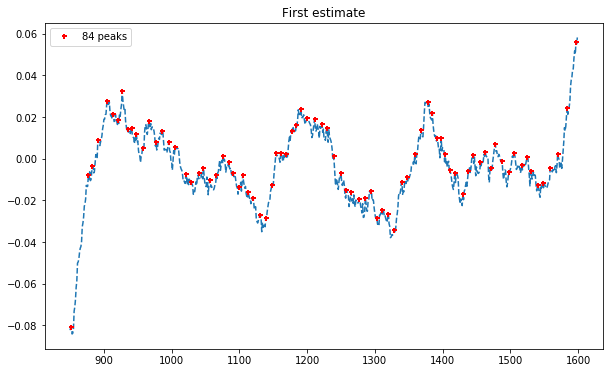

In [143]:
indexes = peakutils.indexes(n_hat, thres=0, min_dist=5)
print(indexes)
print(x[indexes], n_hat[indexes])
pyplot.figure(figsize=(10,6))
pplot(x, n_hat, indexes)
pyplot.title('First estimate')

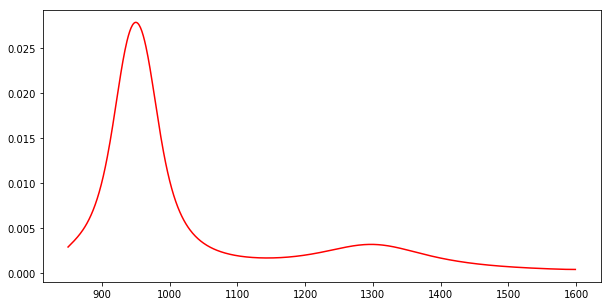

In [155]:
# generate some noisy data from two Gaussians:
# generate numbers
x = lorentzian.nm
#generate a two-gaussian mixture model with time decays and spectral shift 
n = lorentzian.species_1 + lorentzian.species_2
np.random.seed(1729)
n_noise = 0 * np.random.normal(size=x.size)
ndata = n + n_noise

n_hat = savitzky_golay(ndata, 51, 1) # window size 51, polynomial order 3

plt.figure(figsize=(10,5))
plt.plot(x,n_hat, color='red')
plt.show()

[100 447]
[ 950 1297] [0.02785568 0.00318366]


Text(0.5,1,'First estimate')

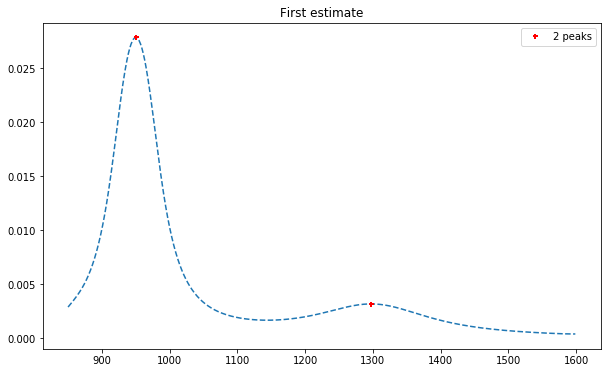

In [156]:
indexes = peakutils.indexes(n_hat, thres=0, min_dist=5)
print(indexes)
print(x[indexes], n_hat[indexes])
pyplot.figure(figsize=(10,6))
pplot(x, n_hat, indexes)
pyplot.title('First estimate')